In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense


In [15]:

df = pd.read_csv('GOOG.csv')


In [16]:
data = df['Close'].values.reshape(-1, 1)

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


In [17]:

seq_length = 60  
X, y = [], []
for i in range(seq_length, len(data_scaled)):
    X.append(data_scaled[i-seq_length:i, 0])
    y.append(data_scaled[i, 0])

X = np.array(X)
y = np.array(y)


In [18]:
X = X.reshape((X.shape[0], X.shape[1], 1))


In [19]:

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [20]:
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(units=50))
model.add(Dense(1))


c:\Users\durva\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:

model.compile(optimizer='adam', loss='mse')
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)        │ (None, 60, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,701 (30.08 KB)

 Trainable params: 7,701 (30.08 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/30


120/120 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.0127 - val_loss: 0.0330
Epoch 2/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1.1930e-04 - val_loss: 0.0258
Epoch 3/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1.0136e-04 - val_loss: 0.0181
Epoch 4/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 9.4554e-05 - val_loss: 0.0146
Epoch 5/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 9.9177e-05 - val_loss: 0.0128
Epoch 6/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 7.4054e-05 - val_loss: 0.0123
Epoch 7/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 6.4750e-05 - val_loss: 0.0107
Epoch 8/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 6.4382e-05 - val_loss: 0.0088
Epoch 9/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 8.9228e-05 - val_loss: 0.0081
Epoch 10/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 5.8708e-05 - val_loss: 0.0060
Epoch 11/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 4.4526e-05 - val_loss: 0.0055
Epoch 12/30


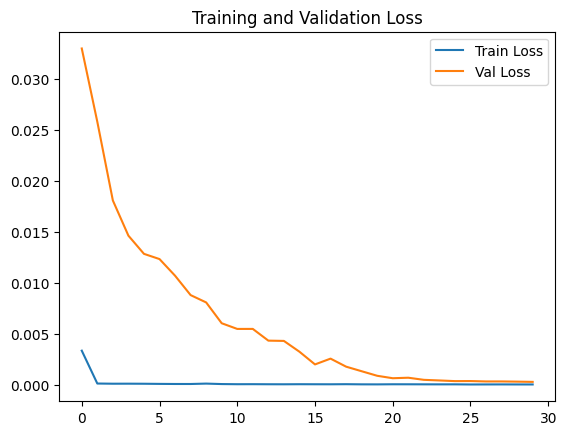

In [23]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Training and Validation Loss")
plt.show()



In [24]:
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
true_prices = scaler.inverse_transform(y_test.reshape(-1, 1))


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


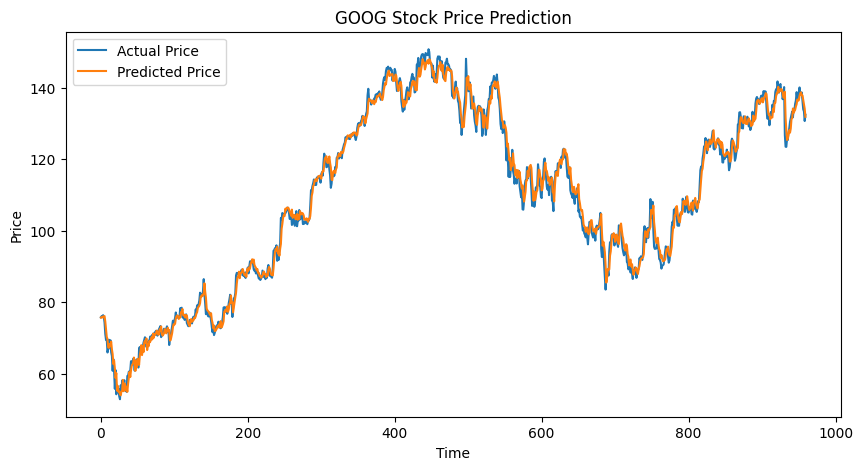

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(true_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title("GOOG Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()


In [ ]:

from sklearn.metrics import classification_report
true_direction = (true_prices[1:] > true_prices[:-1]).astype(int)
predicted_direction = (predicted_prices[1:] > predicted_prices[:-1]).astype(int)


In [27]:

report = classification_report(true_direction, predicted_direction, target_names=['Down', 'Up'])
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

        Down       0.43      0.43      0.43       446
          Up       0.50      0.50      0.50       513

    accuracy                           0.47       959
   macro avg       0.47      0.47      0.47       959
weighted avg       0.47      0.47      0.47       959

